<a href="https://colab.research.google.com/github/confusetrial/DeepLearningExercise/blob/main/Red_wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [111]:
drive.mount('/content/drive')

data_path = '/content/drive/My Drive/Colab Notebooks/dataset/RedwineQuality/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import warnings

warnings.filterwarnings(action='ignore')

In [113]:
train = pd.read_csv(data_path+'winequality-red.csv')
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [115]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


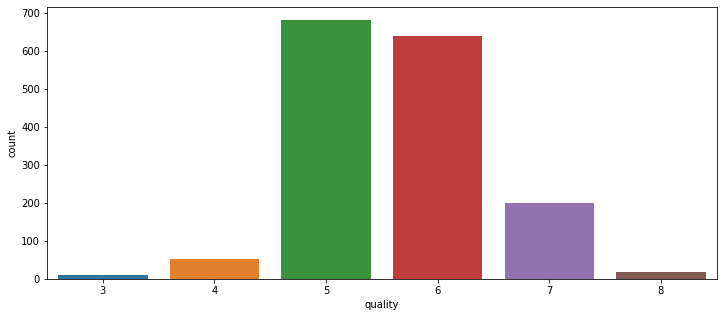

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(train['quality'])

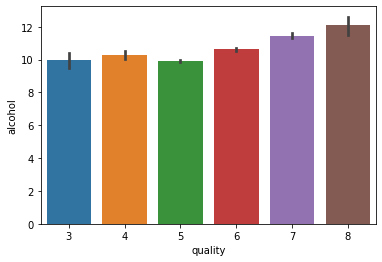

In [116]:
sns.barplot(x='quality',y='alcohol',data = train)

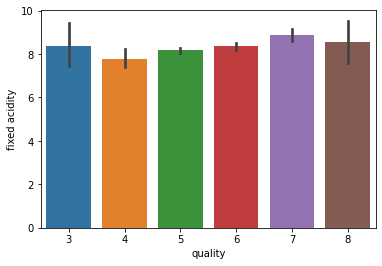

In [118]:
sns.barplot(x='quality',y='fixed acidity',data = train)

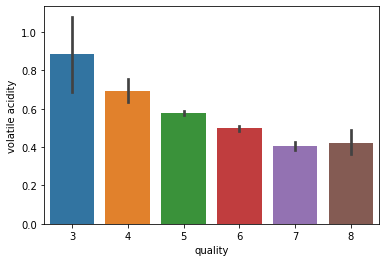

In [119]:
sns.barplot(x='quality',y='volatile acidity',data = train)

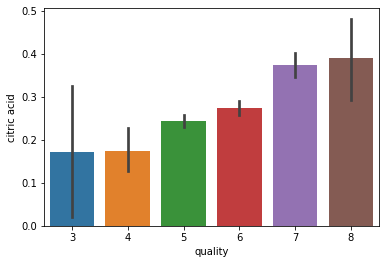

In [120]:
sns.barplot(x='quality',y='citric acid',data = train)

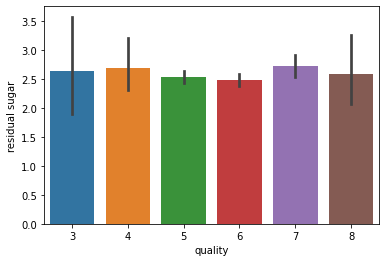

In [121]:
sns.barplot(x='quality',y='residual sugar',data = train)

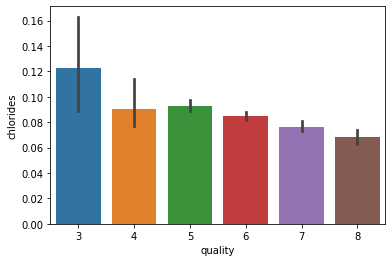

In [122]:
sns.barplot(x='quality',y='chlorides',data = train)

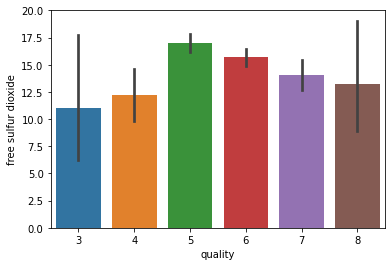

In [123]:
sns.barplot(x='quality',y='free sulfur dioxide',data = train)

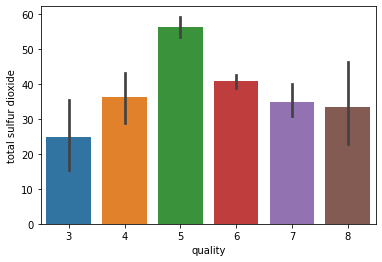

In [124]:
sns.barplot(x='quality',y='total sulfur dioxide',data = train)

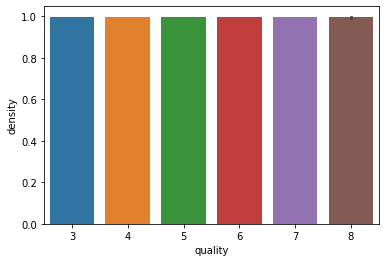

In [125]:
sns.barplot(x='quality',y='density',data = train)

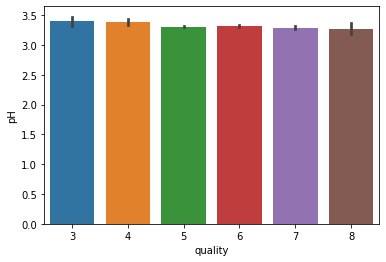

In [126]:
sns.barplot(x='quality',y='pH',data = train)

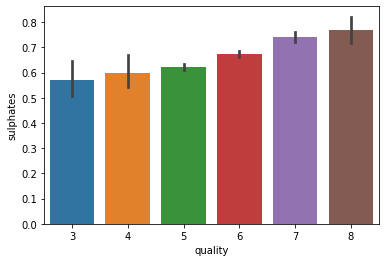

In [127]:
sns.barplot(x='quality',y='sulphates',data = train)

In [117]:
train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

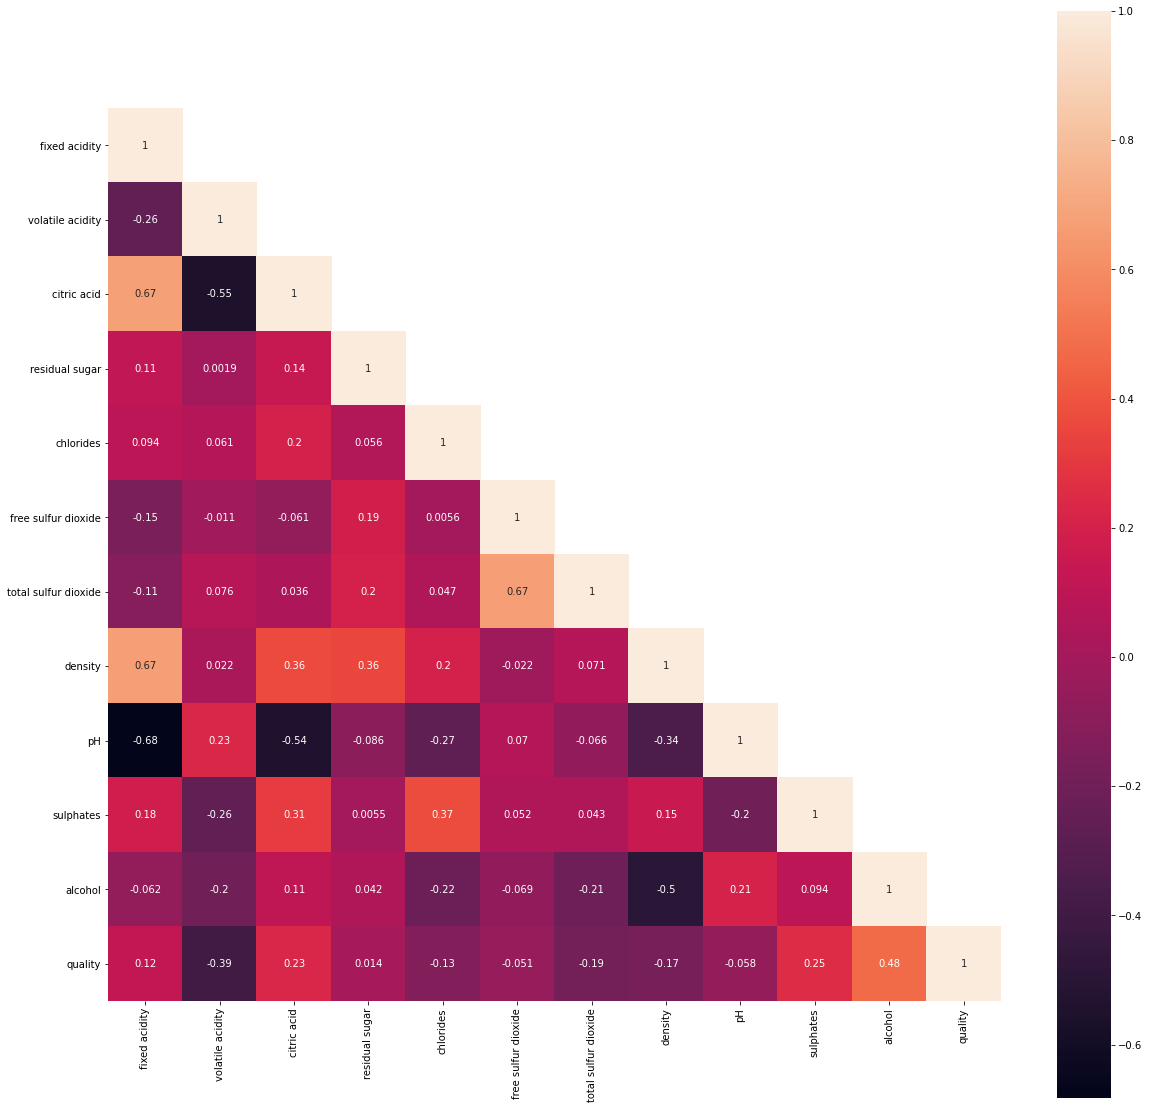

In [77]:
plt.figure(figsize=(20,20))
corrMat = train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]
corrMat = corrMat.corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(corrMat,mask=mask,annot=True,square=True)

In [128]:
train.drop(['fixed acidity','density','residual sugar','pH','alcohol'],axis=1,inplace=True)
train.head()

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,quality
0,0.70,0.00,0.076,11.0,34.0,0.56,5
1,0.88,0.00,0.098,25.0,67.0,0.68,5
2,0.76,0.04,0.092,15.0,54.0,0.65,5
3,0.28,0.56,0.075,17.0,60.0,0.58,6
4,0.70,0.00,0.076,11.0,34.0,0.56,5


In [129]:
quality = train['quality']
train.drop(['quality'],axis=1,inplace=True)

In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(np.array(train),np.array(quality),test_size=0.2,random_state=42)

In [95]:
x_train.shape

(1279, 8)

In [90]:
y_train.shape

(1279,)

In [139]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
model = Sequential()
model.add(Dense(256,input_shape=(x_train.shape[1],),activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1],activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               1792      
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 9)                 2313      
Total params: 4,105
Trainable params: 4,105
Non-trainable params: 0
_________________________________________________________________


In [92]:
y_train.shape

(1279, 9)

In [140]:
hist = model.fit(x_train,y_train,batch_size=32,epochs=1000)

Epoch 1/1000
40/40 [==============================] - 0s 2ms/step - loss: 6.2837 - acc: 0.2216
Epoch 2/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.2226 - acc: 0.4084
Epoch 3/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.1247 - acc: 0.4068
Epoch 4/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.7421 - acc: 0.4458
Epoch 5/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.6352 - acc: 0.4558
Epoch 6/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.4781 - acc: 0.4762
Epoch 7/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.5742 - acc: 0.4423
Epoch 8/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.5059 - acc: 0.4516
Epoch 9/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3723 - acc: 0.4757
Epoch 10/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3110 - acc: 0.4498
Epoch 11/1000
40/40 [============================

In [141]:
eval = model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 1.0181 - acc: 0.5531


In [142]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy',n_estimators=5000,max_depth=200,random_state=42)
clf.fit(x_train,y_train)

clf.score(x_train,y_train)
clf.score(x_test,y_test)

0.521875